# Time Series Analysis of Historical Sunspot Data

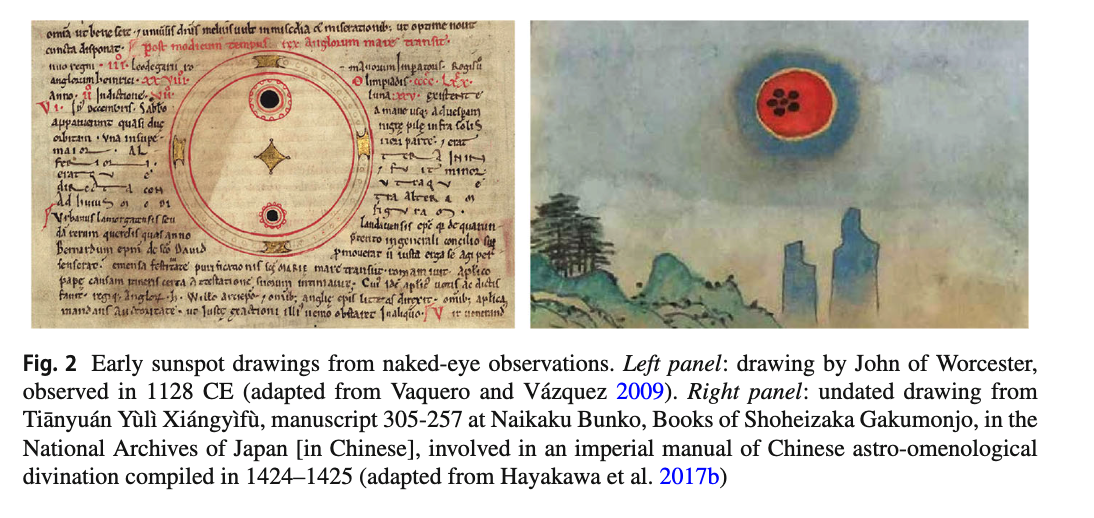

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [16]:
sun = pd.read_csv('SN_m_tot_V2.0.csv', delimiter=';', header=None)
sun = sun.iloc[:, 2:4]
sun.columns = ['year', 'spots']
sun



,year,spots
0,1749.042,96.7
1,1749.123,104.3
2,1749.204,116.7
3,1749.288,92.8
4,1749.371,141.7
...,...,...
3288,2023.042,143.6
3289,2023.122,110.9
3290,2023.204,122.6
3291,2023.286,96.4


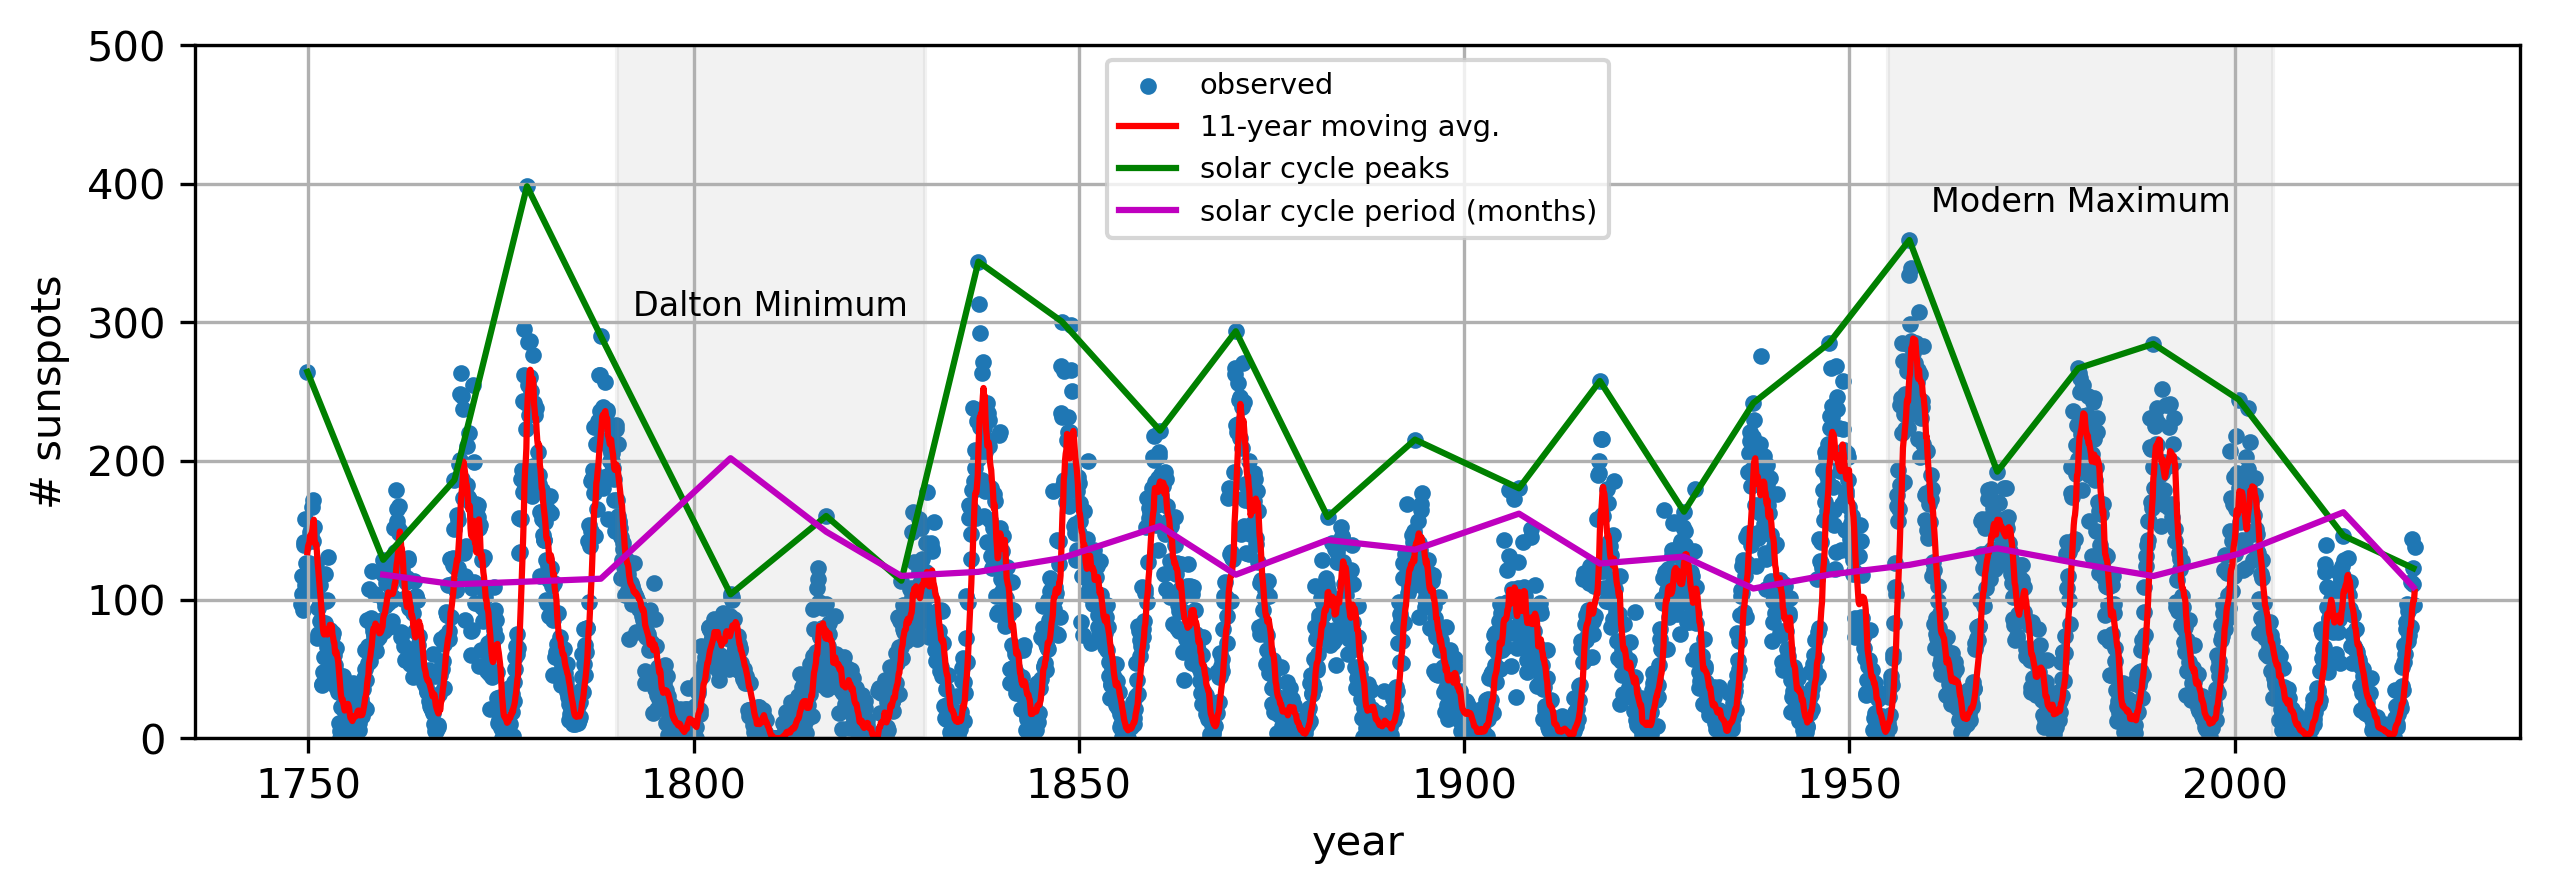

In [30]:
# plot the data

sun['ma11'] = sun.spots.rolling(window=11).mean()

plt.figure(figsize=(10,3), dpi=300)
plt.scatter(sun.year, sun.spots, marker='.', label='observed')
plt.plot(sun.year, sun.ma11, c='r' , label='11-year moving avg.')
plt.plot(peak_years, peak_spots, c='g', label='solar cycle peaks')
plt.plot(peak_df.year, peak_df.period*12, c='m', label='solar cycle period (months)')
plt.xlabel('year')
plt.ylabel('# sunspots')
plt.ylim(0, 500)
plt.axvspan(1955, 2005, alpha=.1, color='grey')
plt.axvspan(1790, 1830, alpha=.1, color='grey')
plt.grid()
plt.legend(loc='upper center', fontsize='x-small')
plt.text(1810, 305, 'Dalton Minimum', ha='center', fontsize=8)
plt.text(1980, 380, 'Modern Maximum', ha='center', fontsize=8)
plt.show()

In [19]:
# Fast-Fourier Transform Decomposition
N = sun.shape[0] # number of data points
T = 1.0 / 12.0  # monthly observation
xf = np.fft.fftfreq(N,T)
yf = np.fft.fft(sun.spots)

# Keep only positive frequencies
# Remove symmetric values
frequencies = xf[1:N//2]
amplitudes = np.abs(yf[1:N//2]) / 10**4

periods = 1.0 / frequencies   # convert frequences to periods

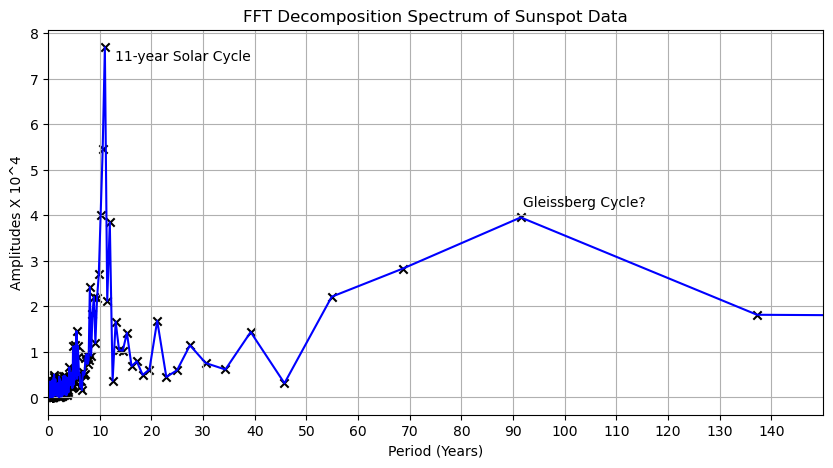

In [20]:
# Create a plot
plt.figure(figsize=(10, 5))
plt.scatter(periods, amplitudes, marker = 'x', c='k')
plt.plot(periods, amplitudes, 'b-')
plt.xlabel('Period (Years)')
plt.ylabel('Amplitudes X 10^4')
plt.title('FFT Decomposition Spectrum of Sunspot Data')
plt.grid(True)
plt.xlim(1, 150)  # Limit x range to only show positive period values
plt.xticks(range(0, 150, 10))
plt.text(13, 7.4, '11-year Solar Cycle')
plt.text(92, 4.2, 'Gleissberg Cycle?')
#plt.xscale('log')
plt.show()

Wolfgang Gleißberg (March 25, 1903 - April 1, 1985) was a German astronomer known for his work in solar physics and terrestrial magnetism. His most significant contribution to the field was the identification of the long-term solar cycle known as the Gleissberg cycle.

Born in Berlin, Gleißberg began his career studying under the influential astronomer Karl Schwarzschild. He then worked at the Potsdam-Babelsberg Observatory, where he focused on studying solar-terrestrial relationships. During this time, he developed an interest in the cyclical nature of solar phenomena.

Gleißberg is best known for identifying an 80 to 90 year cycle in solar activity, which was later named the Gleissberg cycle. He observed that the sunspot cycle's amplitude and length aren't constant, but instead seem to follow a predictable, longer-term cycle. He postulated this longer cycle could help predict periods of intense solar activity as well as "solar minimums" where activity is lower.

Despite the significance of his work, Gleissberg's ideas were not immediately accepted. It was only later that other scientists came to recognize the importance of his observations and the existence of the cycle bearing his name.

In addition to his work on solar cycles, Gleissberg also contributed to understanding the Earth's magnetic field and its interactions with solar activity. He passed away in 1985, but his work continues to influence the field of solar physics.

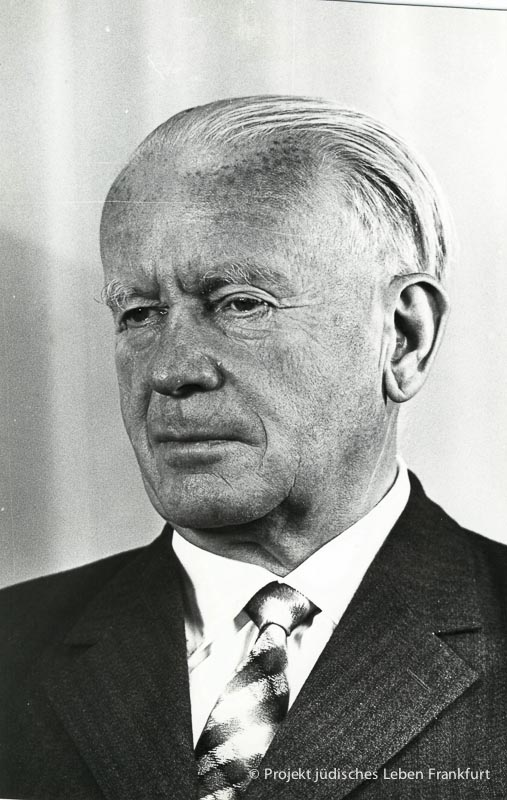

In [21]:
# Phase diagram

sun['delta'] = sun.spots.diff()
sun['delta2'] = sun.delta.diff()
sun

,year,spots,ma11,delta,delta2
0,1749.042,96.7,NaN,NaN,NaN
1,1749.123,104.3,NaN,7.6,NaN
2,1749.204,116.7,NaN,12.4,4.8
3,1749.288,92.8,NaN,-23.9,-36.3
4,1749.371,141.7,NaN,48.9,72.8
...,...,...,...,...,...
3288,2023.042,143.6,93.072727,30.8,-1.5
3289,2023.122,110.9,96.009091,-32.7,-63.5
3290,2023.204,122.6,99.518182,11.7,44.4
3291,2023.286,96.4,99.509091,-26.2,-37.9


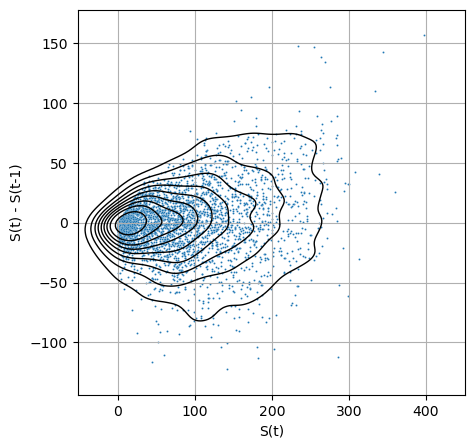

In [22]:
plt.figure(figsize=(5,5), dpi=100)
sns.scatterplot(x=sun.spots, y=sun.delta, s=2)
#sns.histplot(x=sun.delta, y=sun.delta2, bins=100, pthresh=.2, cmap='viridis')
sns.kdeplot(x=sun.spots, y=sun.delta, levels=10, color='k', linewidths=1)
plt.grid()
plt.xlabel('S(t)')
plt.ylabel('S(t) - S(t-1)')
plt.show()

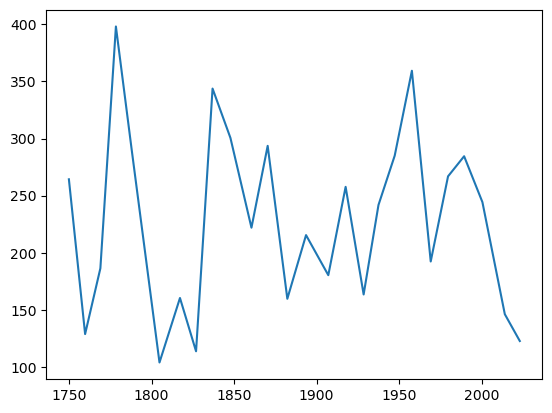

In [23]:
# Finding peak values
from scipy.signal import find_peaks
peaks, _ = find_peaks(sun.spots, distance=9*12)
peak_years = sun.year[peaks]
peak_spots = sun.spots[peaks]
plt.plot(peak_years, peak_spots)

In [24]:
peak_df = pd.DataFrame({
    'year': peak_years,
    'spots': peak_spots
})

peak_df['period'] = peak_df.year.diff()
peak_df

,year,spots,period
10,1749.874,264.3,NaN
128,1759.707,128.7,9.833
239,1768.958,186.3,9.251
352,1778.371,398.2,9.413
467,1787.958,290.0,9.587
669,1804.791,103.8,16.833
818,1817.204,160.3,12.413
935,1826.958,113.6,9.754
1055,1836.958,343.8,10.000
1185,1847.790,300.6,10.832


In [25]:
peak_df.mean()

year      1886.831115
spots      227.861538
period      10.933200
dtype: float64

In [26]:
peak_df.max()

year      2023.204
spots      398.200
period      16.833
dtype: float64

In [27]:
peak_df.min()

year      1749.874
spots      103.800
period       8.998
dtype: float64

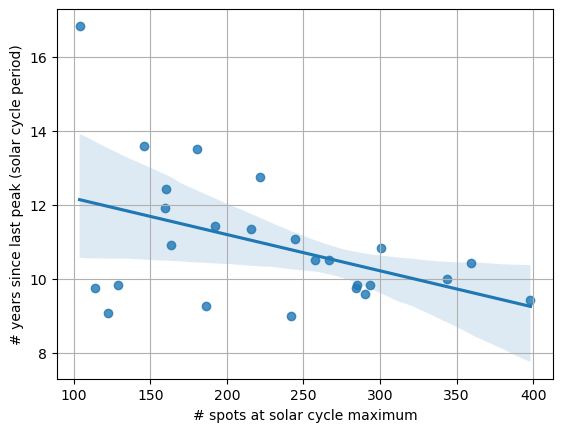

In [28]:
# Is period correlated with the amplitude of the solar cycle (# of spots at maximum?)
sns.regplot(peak_df, x='spots', y='period', ci=95)
plt.xlabel('# spots at solar cycle maximum')
plt.ylabel('# years since last peak (solar cycle period)')
plt.grid()
plt.show()

In [29]:
# Moderate correlation
peak_df.spots.corr(peak_df.period)

-0.4422776998276138

It is indeed observed that the period of the solar cycle can vary, and some research suggests that it tends to be longer during periods of low solar activity. The 11-year cycle is an average, and individual cycles can range from about 9 to 14 years. 

The Dalton Minimum, a period of low solar activity that occurred from about 1790 to 1830, is a good example. During this time, there were fewer sunspots and the period of the solar cycle was observed to be slightly longer than the average 11 years.

However, the relationship between solar cycle length and solar activity is complex and not yet fully understood. While there is some evidence of a correlation, there are also many other factors at play and exceptions to this rule.

Remember that our understanding of these phenomena is based on a limited historical record, and new observations or analyses could lead to revisions or refinements of these ideas. Solar physics is a complex field and many aspects of the sun's behavior are still topics of ongoing research.